# DPhi Data Visualization Assignment Details

Dear Learner, 

Congratulations, you have studied Data Visualization all the way through the end of this bootcamp!!! This is the final graded hands-on exercise where you will be accomplishing the below mentioned task.

# Step 1: Select a Tabular Dataset of your choice

*   https://www.kdnuggets.com/datasets/index.html
*   https://dphi.tech/challenges/#past 
* https://pub.towardsai.net/best-datasets-for-machine-learning-data-science-computer-vision-nlp-ai-c9541058cf4f  
* https://medium.com/analytics-vidhya/top-100-open-source-datasets-for-data-science-cd5a8d67cc3d

or you can pick any dataset of your interest on the internet and add reference to it


# Evaluation Criteria

Your submission will be evaluated using the following criteria:

* You must ensure that the dataset is tabular.  
* You must ask and answer at least 3 questions about the dataset
*   Your submission must include at least 3 visualizations (graphs)
*   Your submission must include explanations using markdown cells, apart from the code.
*   Your work must not be plagiarized i.e. copied for somewhere else.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# The dataset is taken from Kaggle: https://www.kaggle.com/datasets/alexandrparkhomenko/top-apps-in-google-play
data = pd.read_csv('Top-Apps-in-Google-Play.csv', header=0, index_col=0)
print(data.shape)
data.sample(7)

(70, 9)


,App Name,App Id,Category,Developer Id,Developer Website,Developer Email,Content Rating,Ad Supported,In App Purchases
20,Currents,com.google.android.apps.plus,Social,Google LLC,https://support.google.com/plus/?hl=en#topic=6...,apps-help@google.com,Teen,False,False
46,"Microsoft Excel: View, Edit, & Create Spreadsh...",com.microsoft.office.excel,Productivity,Microsoft Corporation,https://products.office.com,officean@microsoft.com,Everyone,False,True
14,Messenger – Text and Video Chat for Free,com.facebook.orca,Communication,Facebook,https://www.facebook.com/games/fbmessenger_and...,android-support@fb.com,Everyone,False,True
19,Google Duo - High Quality Video Calls,com.google.android.apps.tachyon,Communication,Google LLC,https://google.com/,apps-help@google.com,Everyone,False,False
5,Google Text-to-Speech,com.google.android.tts,Tools,Google LLC,http://www.google.com/,tts-feedback@google.com,Everyone,False,False
42,TikTok,com.zhiliaoapp.musically,Social,TikTok Pte. Ltd.,https://www.tiktok.com/,feedback@tiktok.com,Teen,True,True
24,Google News - Top world & local news headlines,com.google.android.apps.magazines,News & Magazines,Google LLC,https://news.google.com/about,apps-help@google.com,Teen,True,False


#Step 2: Perform Exploratory Analysis & Visualization

1. Explore distributions of numeric columns using histograms etc.
2. Explore relationships between columns using scatter plots, bar charts etc.
3. Make a note of interesting insights from the exploratory analysis


In [13]:
data.isnull().sum()

App Name             0
App Id               0
Category             0
Developer Id         0
Developer Website    0
Developer Email      0
Content Rating       0
Ad Supported         0
In App Purchases     0
dtype: int64

We observe that we don't have any null values so we don't have to worry about interpolating.

In [15]:
data[data.duplicated()]

,App Name,App Id,Category,Developer Id,Developer Website,Developer Email,Content Rating,Ad Supported,In App Purchases


We observe that we don't have any duplicated rows.

In [12]:
data.nunique()

App Name             69
App Id               70
Category             17
Developer Id         19
Developer Website    53
Developer Email      37
Content Rating        4
Ad Supported          2
In App Purchases      2
dtype: int64

From the table, we did get an insight that 'Ad Supported' and 'In App Purchases' have a boolean domain so it makes sense why they have only 2 unique values. The column 'Ad Supported' has 4 categories of age which cover children, teens, adults, and everyone.

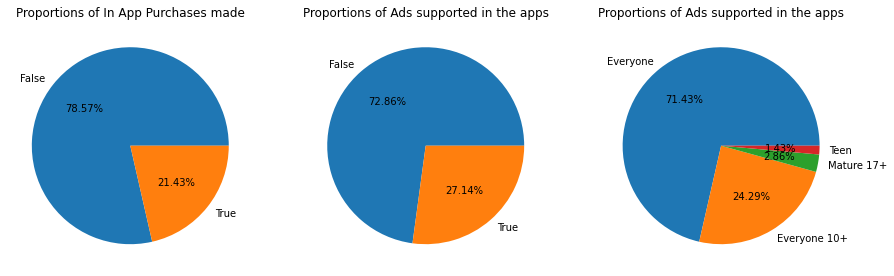

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
x = data['In App Purchases']
ax[0].pie([np.mean(x == False), np.mean(x == True)], labels = ['False', 'True'], autopct='%1.2f%%')
ax[0].set_title('Proportions of In App Purchases made')

x = data['Ad Supported']
ax[1].pie([np.mean(x == False), np.mean(x == True)], labels = ['False', 'True'], autopct='%1.2f%%')
ax[1].set_title('Proportions of Ads supported in the apps')

x = data['Content Rating']
ax[2].pie(x.value_counts(), labels = np.unique(x), autopct='%1.2f%%')
ax[2].set_title('Proportions of Age-based apps')

plt.show()

We observe that majority of popular apps don't support ads or in-app purchases and are available for everyone. There are only few apps which are more appropriate (Facebook and Twitter, for example) for teens and adults to use.

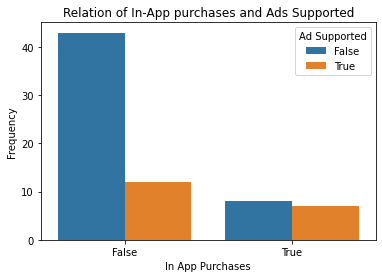

In [68]:
sns.countplot(x=data['In App Purchases'], hue=data['Ad Supported'])
plt.title('Relation of In-App purchases and Ads Supported')
plt.ylabel('Frequency')
plt.show()

From the countplot, we observe that Most of the apps with no in-app purchases don't have ads. Apps such as Google Photos or even a simple Calculator are examples of this dominating category.

# Step 3: Exploration & Inference

1. Ask at least 3 interesting questions about your dataset
2. Answer the questions by computing the results by plotting graphs using Matplotlib
3. Add concluding remarks


# Question 1  

Which category of the apps is the most popular?

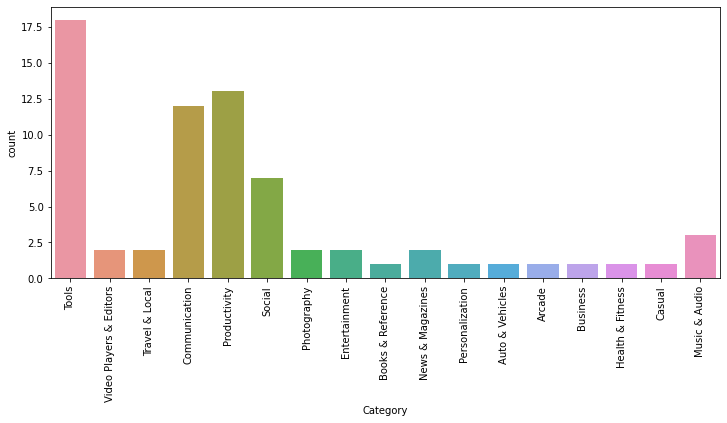

In [123]:
plt.figure(figsize=(12,5))
sns.countplot(x = data['Category'])
plt.xticks(rotation=90)
plt.show()

We observe that 18 apps are of category 'Tools', which is the most popular category

# Question 2  

For Communication and Tools, find out the most frequent develop ID.

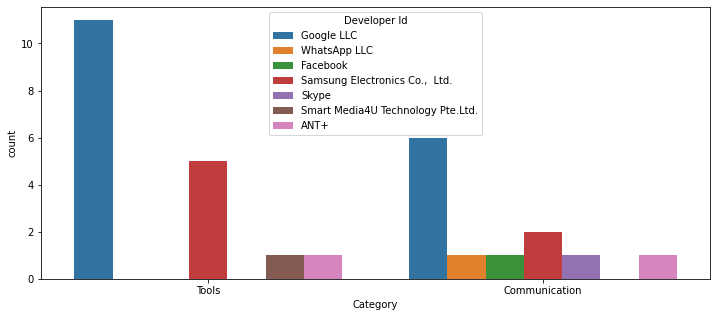

In [149]:
tempdata = data[(data['Category'] == 'Tools') | (data['Category'] == 'Communication')]
plt.figure(figsize=(12,5))
sns.countplot(x=tempdata.Category, hue=tempdata['Developer Id'])
plt.show()

We observe that majority of developers are from Google LLC that work on tools or communication based apps. Not part of the answer, but Samsung is the 2nd popular Developer ID. It does make sense why Facebook and Whatsapp are only communication based but not tools based.

# Question 3  

For Google LC, find out what percentage of their apps have in app purchases.

(33, 9)


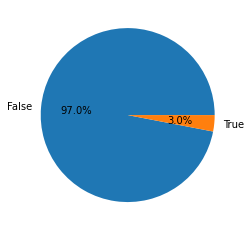

In [167]:
tempdata = data[data['Developer Id'] == 'Google LLC']
print(tempdata.shape)
plt.pie(tempdata['In App Purchases'].value_counts(), labels=np.unique(tempdata['In App Purchases']), autopct='%1.1f%%')
plt.show()

In [174]:
np.around((0.97 * 33, 0.03 * 33))

array([32.,  1.])

In [171]:
tempdata[tempdata['In App Purchases'] == True]

,App Name,App Id,Category,Developer Id,Developer Website,Developer Email,Content Rating,Ad Supported,In App Purchases
9,Google Drive,com.google.android.apps.docs,Productivity,Google LLC,https://support.google.com/drive/?p=android_dr...,apps-help@google.com,Everyone,False,True


We see that only one Google LLC app has an in app purchase and that is Google Drive, which does make sense as users can buy more storage in the app.

THE END